Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers.  Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


In [1]:
# import important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [2]:
# load data into dataframe
categorical = pd.read_csv('categorical.csv')

numerical = pd.read_csv('numerical.csv')


In [3]:
data = pd.concat([numerical, categorical], axis = 1)
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize


In [4]:
data.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
Encoder Type | Column 
-----------------|-----------------
One hot | state
Ordinal | coverage
Ordinal | employmentstatus
Ordinal | location code
One hot | marital status
One hot | policy type
One hot | policy
One hot | renew offercustomer_df
One hot | sales channel
One hot | vehicle class
Ordinal | vehicle size
Ordinal | education
One hot | response
One hot | gender

In [5]:
# ordinal encode

In [6]:
# checking the values for the columns that needed to be ordinal encoded
columns = ['coverage','employmentstatus','location_code','vehicle_size','education']
for i in columns:
    print(i, data[i].unique())


coverage ['Basic' 'Extended' 'Premium']
employmentstatus ['Employed' 'Unemployed' 'Other']
location_code ['Suburban' 'Rural' 'Urban']
vehicle_size ['Medsize' 'Small' 'Large']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


In [7]:
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})


In [8]:
data["employmentstatus"] = data["employmentstatus"].map({"Other" : 0, "Unemployed" : 0.5, "Employed" : 1})

In [9]:
data["vehicle_size"] = data["vehicle_size"].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})

In [10]:
data["education"] = data["education"].map({"High School or Below" : 0, "Bachelor" : 0.5, "College":0.5, "Master" : 1, "Doctor":1})

In [11]:
data["location_code"] = data["location_code"].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})

In [12]:
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,1.0,F,0.5,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,0.5
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,0.5,F,0.5,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,0.5
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,1.0,F,0.5,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,0.5
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,0.5,M,0.5,Married,Corporate Auto,L2,Offer1,Call Center,SUV,0.5
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,1.0,M,0.0,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,California,No,...,1.0,M,1.0,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,0.5
9130,3096.511217,21604,79,14,28,0,1,379.200000,California,Yes,...,1.0,F,0.5,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,0.5
9131,8163.890428,0,85,9,37,3,2,790.784983,California,No,...,0.5,M,0.5,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,0.5
9132,7524.442436,21941,96,34,3,0,3,691.200000,California,No,...,1.0,M,0.5,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,1.0


In [13]:
# X-y split
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis = 1)

In [14]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [15]:
from sklearn.preprocessing import MinMaxScaler

#seperate the numerical value and categorical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

# split numericals and categoricals

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)


In [16]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.214185,0.227929,0.037975,0.314286,0.686869,0.0,0.125,0.0,0.5,1.0,1.0,0.5
1,0.005043,0.208191,0.000000,0.942857,0.616162,0.0,0.000,0.0,0.5,0.0,0.5,0.5
2,0.008107,0.000000,0.046414,0.200000,0.777778,0.0,0.000,0.0,0.0,0.5,0.5,0.0
3,0.126940,0.000000,0.236287,0.428571,0.686869,0.0,0.125,0.0,0.0,0.5,0.5,0.5
4,0.068202,0.262492,0.016878,0.314286,0.393939,0.0,0.125,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.333447,0.210782,0.565401,0.171429,0.474747,0.0,0.125,1.0,0.5,0.0,0.5,0.0
7303,0.037743,0.988225,0.265823,0.200000,0.363636,0.2,0.000,0.5,0.5,1.0,0.0,0.5
7304,0.156427,0.000000,0.329114,0.142857,0.565657,0.0,0.125,0.5,0.5,0.5,0.5,0.5
7305,0.079637,0.196907,0.236287,0.485714,0.414141,0.2,1.000,0.0,0.0,0.0,0.5,0.5


In [17]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

# we will reuse encoder and cols when encoding the X_test_cat
X_train_cat = pd.DataFrame(encoded_cat, columns=cols)
X_train_cat.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
# concat the numerical and categorical data together
X_train_transformed = pd.concat([X_train_norm, X_train_cat], axis = 1)
X_train_transformed

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.214185,0.227929,0.037975,0.314286,0.686869,0.0,0.125,0.0,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005043,0.208191,0.000000,0.942857,0.616162,0.0,0.000,0.0,0.5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008107,0.000000,0.046414,0.200000,0.777778,0.0,0.000,0.0,0.0,0.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.126940,0.000000,0.236287,0.428571,0.686869,0.0,0.125,0.0,0.0,0.5,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.068202,0.262492,0.016878,0.314286,0.393939,0.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.333447,0.210782,0.565401,0.171429,0.474747,0.0,0.125,1.0,0.5,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7303,0.037743,0.988225,0.265823,0.200000,0.363636,0.2,0.000,0.5,0.5,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7304,0.156427,0.000000,0.329114,0.142857,0.565657,0.0,0.125,0.5,0.5,0.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7305,0.079637,0.196907,0.236287,0.485714,0.414141,0.2,1.000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [19]:
# Transform the test data
# Scaling data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns = X_test_num.columns)
X_test_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.087224,0.281190,0.223629,0.171429,0.272727,0.0,0.25,0.0,0.0,1.0,0.5,0.5
1,0.007993,0.473645,0.016878,0.171429,0.353535,0.0,0.00,0.0,0.5,1.0,0.5,0.0
2,0.027918,0.367373,0.189873,0.371429,0.181818,0.2,0.00,0.0,0.5,1.0,0.5,0.5
3,0.010122,0.175829,0.042194,0.828571,0.707071,0.0,0.00,0.0,0.5,0.0,0.5,0.5
4,0.034832,0.000000,0.025316,0.200000,0.757576,0.0,0.50,0.0,0.5,0.5,0.5,0.5


In [20]:
# for categoricals
# onehot encoding 
encoded_cat = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features = X_test_cat.columns)
X_test_cat = pd.DataFrame(encoded_cat, columns = cols)
X_test_cat

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1824,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
# concat numerical and categorical data for test data
X_test_transformed = pd.concat([X_test_norm, X_test_cat], axis =1)
X_test_transformed

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,...,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.087224,0.281190,0.223629,0.171429,0.272727,0.0,0.250,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.007993,0.473645,0.016878,0.171429,0.353535,0.0,0.000,0.0,0.5,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.027918,0.367373,0.189873,0.371429,0.181818,0.2,0.000,0.0,0.5,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.010122,0.175829,0.042194,0.828571,0.707071,0.0,0.000,0.0,0.5,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.034832,0.000000,0.025316,0.200000,0.757576,0.0,0.500,0.0,0.5,0.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.035082,0.308981,0.000000,0.228571,0.363636,0.0,0.625,0.0,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,0.067347,0.548994,0.147679,0.142857,0.111111,0.6,1.000,0.5,0.5,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1824,0.012247,0.720421,0.046414,0.685714,0.585859,0.0,0.000,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,0.019061,0.681086,0.113924,0.685714,0.535354,0.0,0.000,0.5,0.5,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.

9. You can check also the `MLPRegressor` for this task!

10. Check and discuss the results.  

In [22]:
# Apply linear regression
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_transformed, y_train)

LinearRegression()

In [23]:
#Model Validation
# R2 for training data
from sklearn.metrics import r2_score
predictions = lm.predict(X_train_transformed)
r2_score(y_train, predictions)

0.619247365340827

In [24]:
#R2 for testing data 
predictions_test = lm.predict(X_test_transformed)
r2_score(y_test, predictions_test)

0.6407570529861486

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
def test_models(X_train,X_test,y_train,y_test,models=None):
    if models is None:
        models = {
            'Linear Regression': LinearRegression(),
            'KNN': KNeighborsRegressor(),
            'MLP Regressor': MLPRegressor(max_iter=10000),
            'Random Forest': RandomForestRegressor(),
            'Gradient Boosting': GradientBoostingRegressor(),
            'SVR': SVR(),
            'Decision Tree': DecisionTreeRegressor(),
            'Ridge': Ridge(),
            'Lasso': Lasso(),
            'Elastic Net': ElasticNet()
        }
    
    results= {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)    #train the model
        predictions=model.predict(X_test) #prdict on the test set
        
        mse = mean_squared_error(y_test,predictions) # Mean Squared Error
        r2 = r2_score(y_test,predictions) # R2
        
        results[name] = {"MSE":mse, "R2": r2}
        
    return results

In [27]:
results = test_models(X_train_transformed,X_test_transformed,y_train,y_test)

In [28]:
results

{'Linear Regression': {'MSE': 32135.38283433623, 'R2': 0.6407570529861486},
 'KNN': {'MSE': 48797.993988519964, 'R2': 0.4544849439270041},
 'MLP Regressor': {'MSE': 13306.45358651961, 'R2': 0.8512465332880147},
 'Random Forest': {'MSE': 12145.003183564113, 'R2': 0.8642304416397254},
 'Gradient Boosting': {'MSE': 12653.039470372041, 'R2': 0.8585510802391247},
 'SVR': {'MSE': 72898.64490616883, 'R2': 0.18506264062843203},
 'Decision Tree': {'MSE': 27361.363148556233, 'R2': 0.6941260422358817},
 'Ridge': {'MSE': 32179.139463646585, 'R2': 0.6402678955814933},
 'Lasso': {'MSE': 32521.909409899592, 'R2': 0.636436054328053},
 'Elastic Net': {'MSE': 70038.44492373794, 'R2': 0.21703694994456568}}

In [29]:
# 10 seems like Random Forest is the best model to train the model 

# Lab | Random variable distributions

Refer to the `numerical.csv` dataset that you previously saved.

### Instructions

1. Use the numerical variables from our dataset this week.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [31]:
numerical = pd.read_csv('numerical.csv')

In [32]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_variable(df):
    for i in df.columns:
        sns.histplot(data=df, x= i, kde=True)
        plt.show()

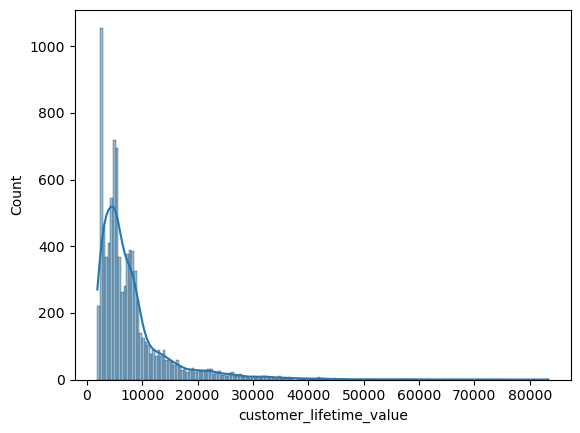

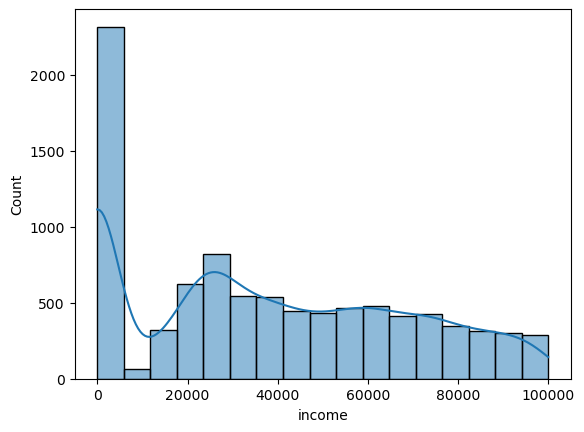

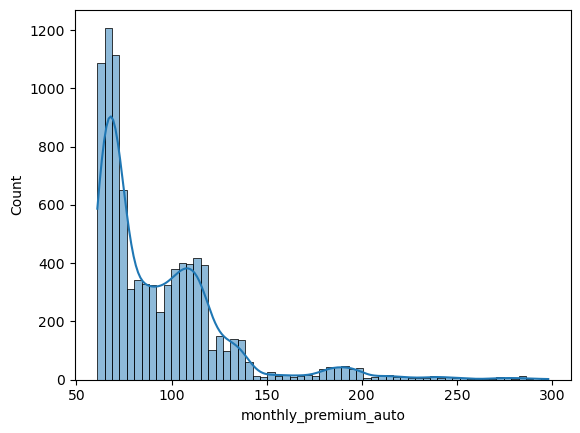

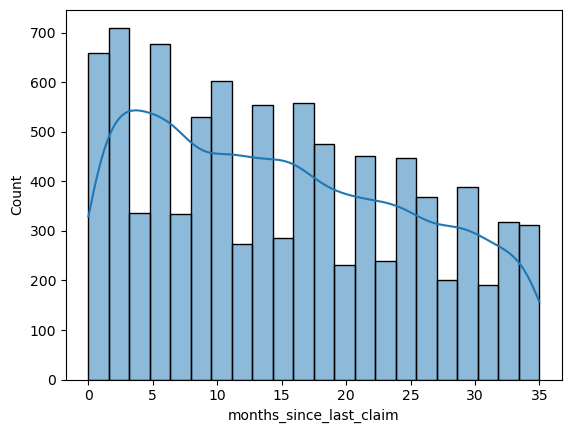

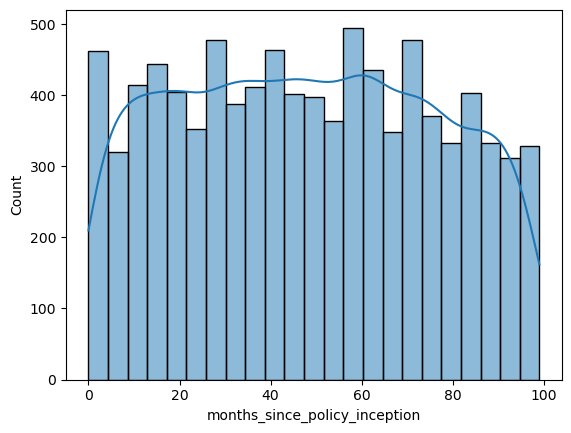

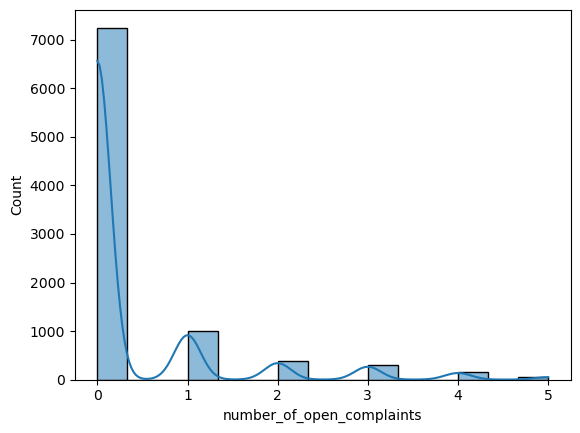

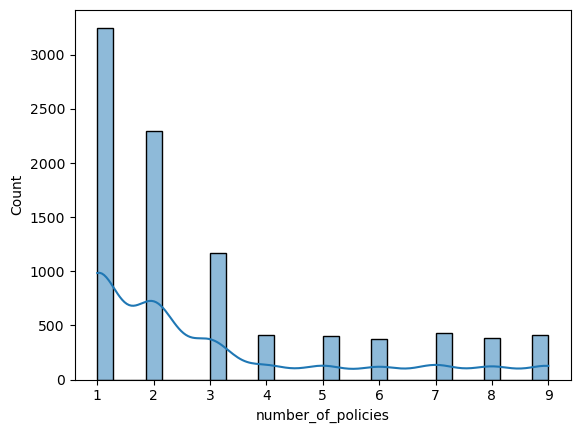

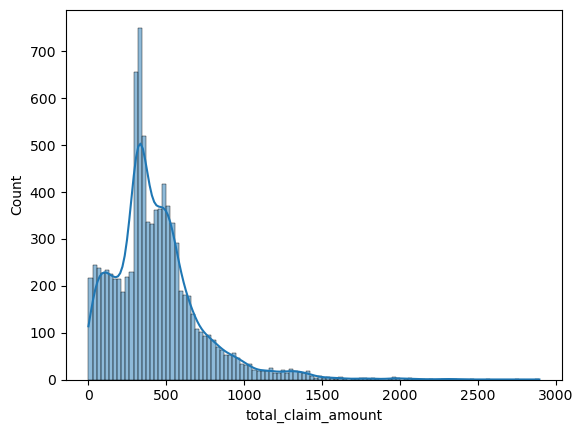

In [38]:
plot_variable(numerical)

In [39]:
numerical_log = np.log(numerical)

/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


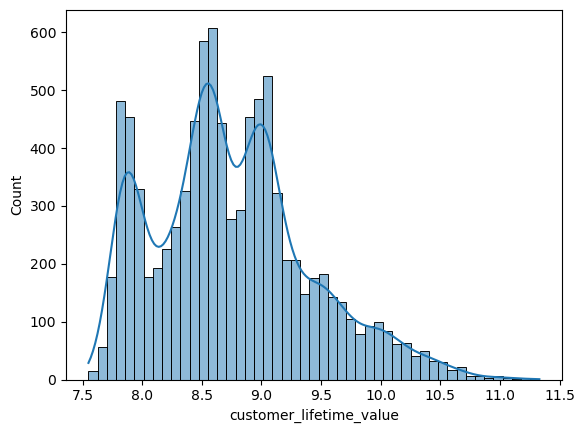

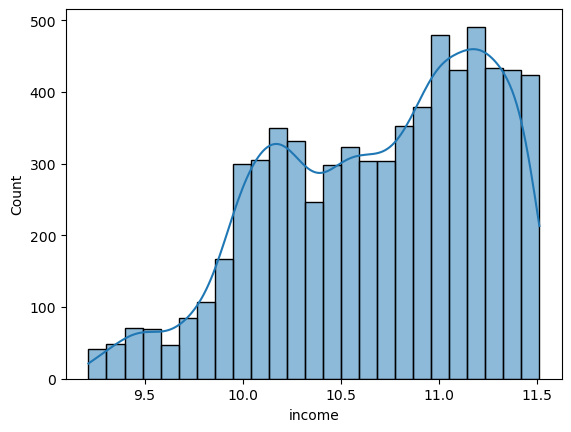

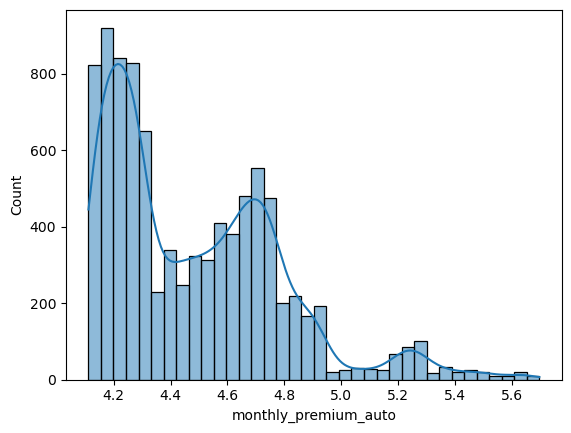

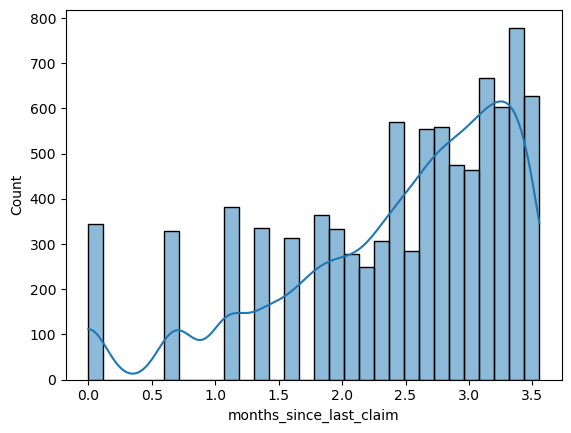

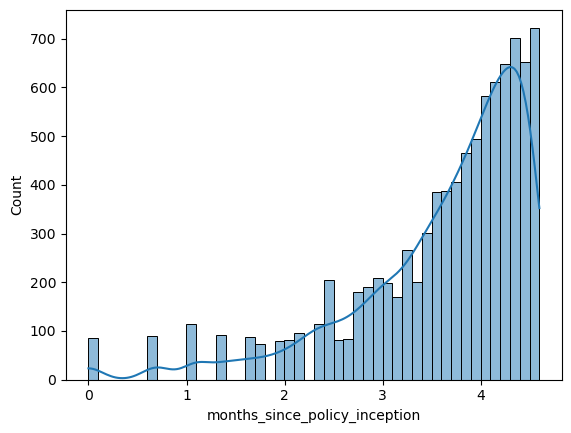

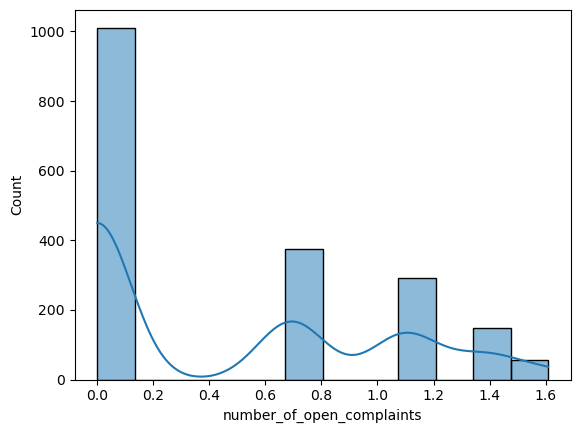

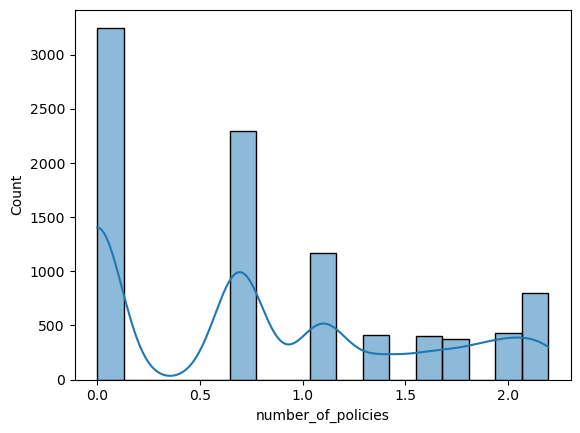

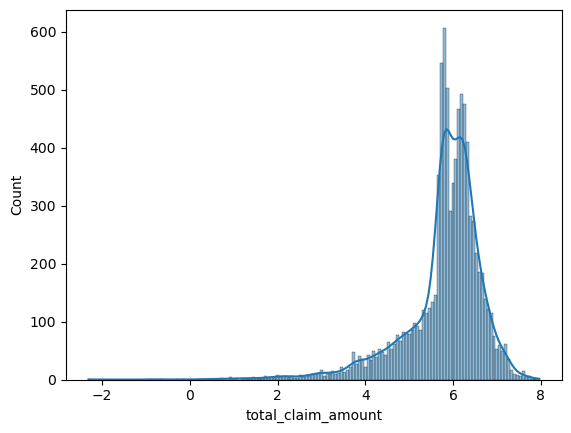

In [40]:
plot_variable(numerical_log)

In [ ]:
# we can see after the tranformation, the 